In [22]:
import numpy as np
from numpy import genfromtxt
from numpy import linalg
import operator
import math
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [33]:
lin=genfromtxt('linear.txt')
lin=lin[1:]
print(lin)

[[-1.      -0.01701]
 [-0.9      0.19027]
 [-0.8     -0.0667 ]
 [-0.7      0.34759]
 [-0.6     -0.00457]
 [-0.5      0.0169 ]
 [-0.4      0.5054 ]
 [-0.3      1.25068]
 [-0.2      1.51939]
 [-0.1      1.17812]
 [ 0.       1.67118]
 [ 0.1      2.1463 ]
 [ 0.2      1.60588]
 [ 0.3      2.54108]
 [ 0.4      1.97292]
 [ 0.5      2.38741]
 [ 0.6      2.91471]
 [ 0.7      3.12256]
 [ 0.8      3.16602]
 [ 0.9      2.86379]
 [ 1.       3.29251]]


In [37]:
def lin_gd(lr,t):
  w1=1
  w2=1
  SSE=0
  for j in range(t):
    dlw1=0
    dlw2=0
    for i in lin:
      dlw1 = dlw1 + 2*i[0]*(w1*i[0] + w2 - i[1])
      dlw2 = dlw2 + 2*(w1*i[0] + w2 - i[1])
    w1=w1-lr*(dlw1/len(lin))
    w2=w2-lr*(dlw2/len(lin))
  plt.scatter(lin[:,0],lin[:,1])
  l=[]
  z=np.linspace(-1,1,num=1000)
  for i in range(len(z)):
    l.append(w1*z[i] + w2)
  for i in lin:
    SSE+=((i[0]*w1 + w2 - i[1])**2)
  SSE=SSE/len(lin)
  plt.plot(z,l,color='black')
  print(w1,w2)
  print('SSE is: ',SSE)
  #print(w1,w2)

1.8531701298701293 1.5525919047619046
SSE is:  0.09296321784065141


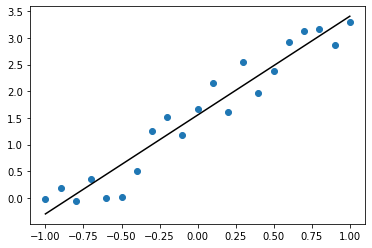

In [38]:
lin_gd(0.2,1000)

Question 2

In [17]:
logi=genfromtxt('logistic.txt')
logi=logi[1:]

In [18]:
x1=[]
x2=[]
y1=[]
y2=[]
for i in logi:
  if i[2]==1:
    x1.append(i[0])
    y1.append(i[1])
  else:
    x2.append(i[0])
    y2.append(i[1])

In [19]:
def sig(x):
  return 1/(1 + np.exp(-x))

In [20]:
def logis_reg(lr,t):
  w=np.zeros(3)
  for i in range(3):
    w[i]=np.random.uniform(-0.1,0.1)
  for i in range(t):
    calc = sig(np.multiply((-logi[:,2]),((logi[:,0]*w[0]) + (logi[:,1]*w[1]) + w[2])))
    z=np.zeros(3)
    w[0]+=lr*(np.sum(calc*np.multiply(logi[:,2],logi[:,0])))
    w[1]+=lr*(np.sum(calc*np.multiply(logi[:,2],logi[:,1])))
    w[2]+=lr*(np.sum(calc*logi[:,2]))
    #w+=lr*z
  return w

[ 2.89701416  3.06709789 -2.46567805]


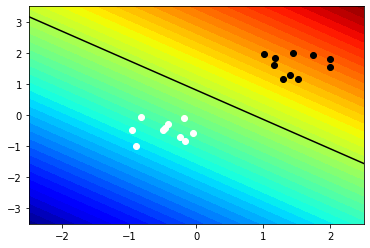

In [21]:
w=np.random.uniform(-2,2,3)
w=logis_reg(0.01,1000)
print(w)
z1=np.linspace(-2.5,2.5,1000)
z2=np.linspace(-3.5,3.5,50)

Z1,Z2 = np.meshgrid(z1,z2)
plt.contourf(Z1,Z2,Z1*w[0]+Z2*w[1]+w[2],50,cmap='jet')
plt.plot(z1,-(z1*w[0] + w[2])/w[1],color='black')
plt.scatter(x1,y1,color='black')
plt.scatter(x2,y2,color='white')

QUESTION 3

In [11]:
(xtr,ytr),(xtst,ytst)=mnist.load_data()
Xtr=[]
Ytr=[]
Xtst=[]
Ytst=[]

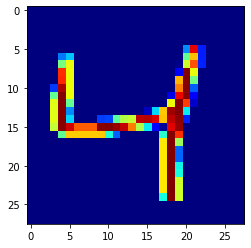

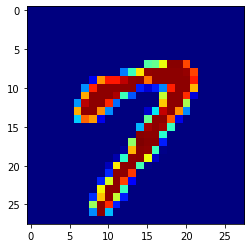

In [12]:
plt.imshow(xtr[2],cmap='jet')
plt.show()
plt.imshow(xtr[15],cmap='jet')
plt.show()

In [13]:
l=ytr.shape[0]
l1=ytst.shape[0]

for i in range(l):
  if (ytr[i]==4):
    Xtr.append(xtr[i].flatten())
    Ytr.append(1)
  if (ytr[i]==7):
    Xtr.append(xtr[i].flatten())
    Ytr.append(-1)

for i in range(l1):
  if (ytst[i]==4):
    Xtst.append(xtst[i].flatten())
    Ytst.append(1)
  if (ytst[i]==7):
    Xtst.append(xtst[i].flatten())
    Ytst.append(-1)


In [14]:
def logi_classi(lr,t):
  w=np.random.uniform(-1,1,784)
  for i in range(t):
    s=np.random.uniform(-1,1)
    for j in range(784):
      s= s + w[j] * Xtr[:,j]
    s=sig(-s*Ytr)
    for j in range(784):
      w[j]+=lr*(np.sum(s*np.multiply(Ytr,Xtr[:,j])))
    #w+=lr*d
  return w

In [15]:
Xtr=np.array(Xtr)
Ytr=np.array(Ytr)
Xtst=np.array(Xtst)
Ytst=np.array(Ytst)

w=logi_classi(0.01,100)

def acc(w):
  ac=0
  x,y=Xtst.shape
  for i in range(x):
    r=np.random.uniform(-1,1)
    for j in range(784):
      r+=w[j]*Xtst[i][j]
    if (r<0 and Ytst[i]==-1) or (r>0 and Ytst[i]==1):
      ac+=1
  ac=ac*100/len(Ytst)
  print('accuracy is: ',ac)

acc(w)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


accuracy is:  98.75621890547264
